In [79]:
## Importamos librerías
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import unidecode

In [306]:
##Leemos el csv
df = pd.read_csv('train.csv')

In [307]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [308]:
##Analisis de Location

In [309]:
#Completamos las localizaciones desconocidas
df.location.fillna('Unknown',inplace=True)

In [310]:

df.location.unique()

array(['Unknown', 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [311]:
##DEBE SER CURADO EL campo location este tiene muchas inconsistencias...por lo que analizaremos casos puntuales 
#y trataremos de sacar lo principal en lo posible (Trataremos de limpiar registros que tienen aparicion en mas de 3 ocasiones)
df.groupby(['location']).target.count().sort_values(ascending=False)

location
Unknown                                          2535
USA                                               104
New York                                           71
United States                                      50
London                                             45
Canada                                             29
Nigeria                                            28
UK                                                 27
Los Angeles, CA                                    26
India                                              24
Mumbai                                             22
Washington, DC                                     21
Kenya                                              20
Worldwide                                          19
Chicago, IL                                        18
Australia                                          18
California                                         17
Everywhere                                         15
New York, NY       

In [323]:
arrayEstados = ['Alaska','Alabama','Arkansas','Arizona','California','Connecticut','Colorado','Delaware',
               'Georgia', 'Iowa', 'Illinois', 'Indiana', 'Kansas','Kentucky', 'New York', 'Washington', 'Texas',
                'Tennessee',
                'Pennsylvania','Oklahoma','New Jersey', 'North Caroline','Oregon','Ohio','Albany','Massachusetts',
               'Michigan', 'Nevada', 'Lousiana', 'Maryland','Minnesota','Maine','Utah','Florida']

In [324]:
##Limpieza de algunos estados Base en algunos estados de EEUU
df['estados'] = df.location.map(lambda x: "Florida" if (x.find("miami") > -1) or (x.find("Miami") > -1) or (x.find("FL") > -1) or (x.find("Florida") > -1) else x)
df['estados'] = df.estados.map(lambda x: "Alaska" if (x.find("AK") > -1) or (x.find("Alask") > -1) or (x.find("alaska") > -1) else x)
df['estados'] = df.estados.map(lambda x: "Alabama" if (x.find("AL") > -1) or (x.find("Alabam") > -1) or (x.find("alabam") > -1) else x)
df['estados'] = df.estados.map(lambda x: "Arkansas" if (x.find("AR") > -1) or (x.find("Arkans") > -1) or (x.find("arkans") > -1) else x)
df['estados'] = df.estados.map(lambda x: "Arizona" if (x.find("AZ") > -1) or (x.find("arizon") > -1) or (x.find("Arizo") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "California" if (x.find("CA") > -1) or (x.find("Californi") > -1) or (x.find("Los Ang") > -1) or (x.find("San D") > -1) or (x.find("San Francis") > -1)  or (x.find("Sacramento") > -1) else x)
df['estados'] = df.estados.map(lambda x: "Connecticut" if (x.find("CT") > -1) or (x.find("Connecticut") > -1) or (x.find("connectic") > -1) else x)
df['estados'] = df.estados.map(lambda x: "Colorado" if (x.find("Colorado") > -1) or (x.find("CO") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Delaware" if (x.find("DE") > -1) or (x.find("Delawar") > -1) or (x.find("delawar") > -1) else x)
df['estados'] = df.estados.map(lambda x: "Georgia" if (x.find("Atlan") > -1) or (x.find("GA") > -1) or (x.find("Georgia") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Iowa" if ( x.find("IA") > -1) or (x.find("Iowa") > -1) or (x.find("iowa") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Illinois" if (x.find("Chicag") > -1) or (x.find("Illinois") > -1) or (x.find("IL") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Indiana" if (x.find("IN") > -1) or (x.find("Indiana") > -1) or (x.find("indiana") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Kansas" if (x.find("KS") > -1) or (x.find("Kansa") > -1) or (x.find("kansa") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Kentucky" if (x.find("KY") > -1) or (x.find("Kentuck") > -1) or (x.find("kentuck") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Lousiana" if (x.find("Lousiana") > -1) or (x.find("lousiana") > -1) else x)
df['estados'] = df.estados.map(lambda x: "Massachusetts" if (x.find("MA") > -1) or (x.find("massachusetts") > -1) or (x.find("Massachusetts") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Maryland" if (x.find("MD") > -1) or (x.find("maryland") > -1) or (x.find("Maryland") > -1) else x)
df['estados'] = df.estados.map(lambda x: "Minnesota" if (x.find("MN") > -1) or (x.find("Minnesota") > -1) or (x.find("minnesota") > -1) else x)
df['estados'] = df.estados.map(lambda x: "Michigan" if (x.find("Michigan") > -1) or (x.find("michigan") > -1) or (x.find("MI") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Maine" if (x.find("ME") > -1) or (x.find("Maine") > -1) or (x.find("maine") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Utah" if (x.find("UT") > -1) or (x.find("utah") > -1) or (x.find("Utah") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "New York" if (x.find("New York") > -1) or (x.find("NY") > -1) else x)
df['estados'] = df.estados.map(lambda x: "Washington" if (x.find("DC") > -1) or (x.find("Washin") > -1) or (x.find("Seatt") > -1 ) else x)
df['estados'] = df.estados.map(lambda x: "Texas" if (x.find("TX") > -1) or (x.find("Texas") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Tennessee" if (x.find("TN") > -1) or (x.find("Tennes") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Pennsylvania" if (x.find("Pennsy") > -1) or (x.find("PA") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Oklahoma" if (x.find("OK") > -1) or (x.find("Okla") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "New Jersey" if (x.find("NJ") > -1) or (x.find("New Jersey") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "North Caroline" if (x.find("NC") > -1) or (x.find("North Carolin") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Oregon" if (x.find("OR") > -1) or (x.find("Orego") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Ohio" if (x.find("OH") > -1) or (x.find("ohio") > -1) or (x.find("Ohio") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Albany" if (x.find("AB") > -1) or (x.find("Albany") > -1) or (x.find("albany") > -1)  else x)
df['estados'] = df.estados.map(lambda x: "Nevada" if (x.find("NV") > -1) or (x.find("Nevad") > -1) or (x.find("nevad") > -1)  else x)


In [325]:
#Armamos dataframe para estados
df_estados= df[df.estados.isin(arrayEstados)]
df_estados.shape

(1656, 7)

In [326]:
#Se hizo una limpiesa...de todas formas no es sufienente ya que tenemos ruidos...lo que demuestra que el campo location 
#no es uniforme y no alcanza con un simple filtrado...
df_estados.sample(10) 


,id,keyword,location,text,target,estados,pais
5322,7600,pandemonium,"Durham, NC",Element of Freedom: The Biggest Party of the S...,0,North Caroline,EEUU
2440,3504,derailment,"Chicago, IL",Service on the Green Line has resumed after an...,1,Illinois,EEUU
5967,8518,screaming,"Mogadishu, New Jersey",@MissDaOh and if she had a screaming baby you ...,0,New Jersey,EEUU
2549,3657,destroy,"Washington, DC",If GOP want to destroy America then Obama is d...,0,Washington,EEUU
251,356,annihilation,CA physically- Boston Strong?,U.S National Park Services Tonto National Fore...,1,California,EEUU
3144,4518,emergency,"Wildomar, CA",When your child needs emergency care they can ...,0,California,EEUU
5080,7244,natural%20disaster,"Littleton, CO",Is your team ready for a natural disaster a vi...,0,Colorado,EEUU
7544,10785,wrecked,"Brooklyn, NY",Wrecked an hour on YouTube with @julian_lage @...,0,New York,EEUU
1316,1900,burning,"Paradise, NV",Uhhhhh demon hunters. But not the whole Burnin...,0,Nevada,EEUU
5347,7633,pandemonium,Los Angeles,Pandemonium In Aba As Woman Delivers Baby With...,0,California,EEUU


Text(0,0.5,'Cantidad Registros')

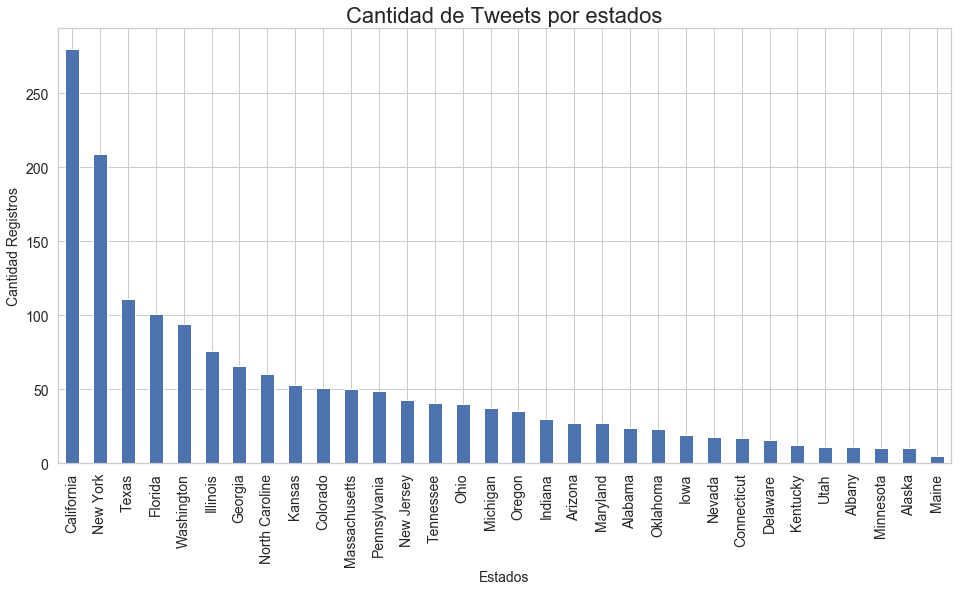

In [327]:
df_toPlot = df_estados.groupby('estados')['target'].count().sort_values(ascending=False)
ax = df_toPlot.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Cantidad de Tweets por estados", fontsize=22)
ax.set_xlabel("Estados",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)


In [328]:
keywordsEEUU = ['EEUU', 'USA', 'usa', 'Estados','estados', 'United States']
keywordsCanada = ['Canada', 'canada', 'alberta', 'ontario','vancouver','Vancouver','Alberta', 'Toronto']
keywordsReinoUnido = ['London', 'UK', 'United Kingdom', 'united kingdom','london','England','england']


In [329]:
##ANALISIS POR PAISES
##Creamos nueva columna para empezar qa limpiar...pero nos basamos en los estados...
df['pais'] = df.estados
#df['pais'] = df.estados.map(lambda x: "EEUU" if x in arrayEstados else x)
##df['pais'] = df.pais.map(lambda x: "EEUU" if x in keyWordsEEUU else x)                           
#df['pais'] = df.pais.map(lambda x: "Canada" if x in keyWordsCanada else x)                           
                        

In [330]:
#Reutilizacion de lo hecho en punto anterior
df['pais'] = df.estados.map(lambda x: "EEUU" if x in arrayEstados else x)
df['pais'] = df.pais.map(lambda x: "EEUU" if (x.find("EEUU") > -1) or (x.find("usa") > -1)
                         or (x.find("USA") > -1) or (x.find("U.S.A") > -1)  or (x.find("United Sta") > -1) else x)

In [345]:
df['pais'] = df.pais.map(lambda x: "Canada" if (x.find("Canada") > -1) or (x.find("canada") > -1)
                         or (x.find("Alberta") > -1) or (x.find("Vancouver") > -1) 
                         or (x.find("alberta") > -1) or (x.find("Toronto") > -1) else x)
df['pais'] = df.pais.map(lambda x: "Reino Unido" if (x.find("UK") > -1) or (x.find("England") > -1)
                         or (x.find("england") > -1) or (x.find("london") > -1) 
                         or (x.find("London") > -1) or (x.find("kingdom") > -1) or (x.find("Leicester") > -1)
                          or (x.find("leicester") > -1) or (x.find("Kingdom") > -1) or (x.find("Manchester") > -1)
                         or (x.find("Scotland") > -1)else x)
df['pais'] = df.pais.map(lambda x: "Australia" if (x.find("australia") > -1) or (x.find("Australia") > -1)
                         or (x.find("Sydney") > -1) or (x.find("Melbourne") > -1) 
                       else x)
df['pais'] = df.pais.map(lambda x: "Nigeria" if (x.find("Niger") > -1) or (x.find("niger") > -1) else x)
df['pais'] = df.pais.map(lambda x: "Irlanda" if (x.find("Ireland") > -1) or (x.find("ireland") > -1) else x)
df['pais'] = df.pais.map(lambda x: "India" if (x.find("India") > -1) or (x.find("Mumbai") > -1)
                         or (x.find("mumbai") > -1) else x)
df['pais'] = df.pais.map(lambda x: "Japan" if (x.find("Japan") > -1) or (x.find("japan") > -1)
                         or (x.find("okio") > -1) else x)
df['pais'] = df.pais.map(lambda x: "China" if (x.find("hina") > -1) or (x.find("CH") > -1) else x)




In [ ]:
df.groupby(['pais']).target.count().sort_values(ascending=False)

Text(0,0.5,'Cantidad Registros')

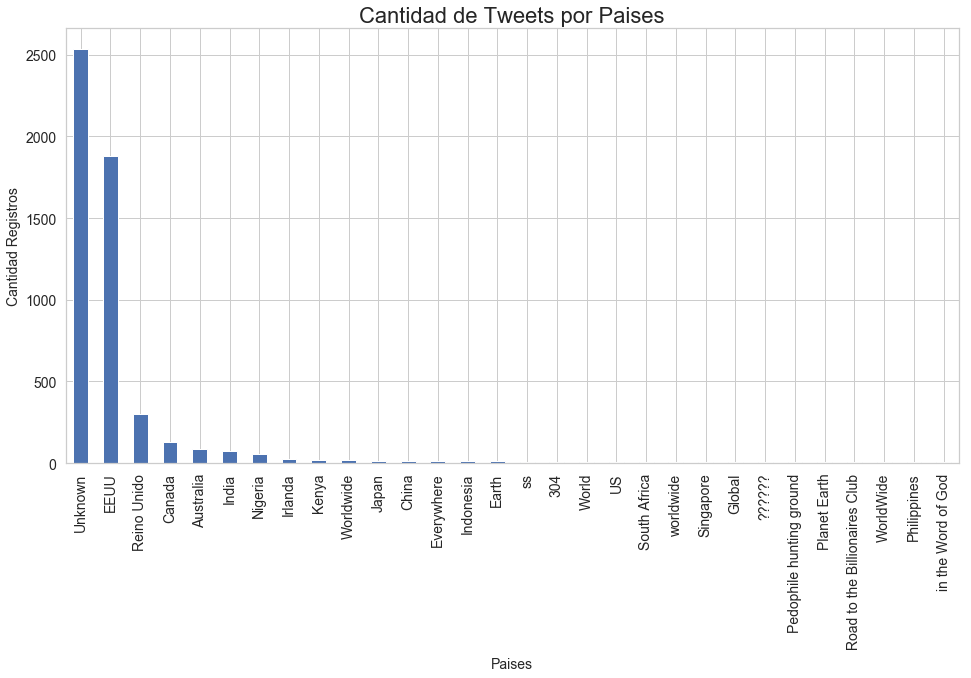

In [355]:
df_toPlot = df.groupby('pais')['target'].count().sort_values(ascending=False)
df_toPlot = df_toPlot.iloc[:30]
ax = df_toPlot.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Cantidad de Tweets por Paises", fontsize=22)
ax.set_xlabel("Paises",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)


In [ ]:
#Esta columna requiere mucho mas limpieza en profundidad...y lo mas probable es que no saquemos informacion mas informacion
#valiosa que los estados mas comunes en estados unidos y la mayor proporcion este campo no tiene informacion 